In [93]:
import os 
import numpy as np

labels_dict = {"hands_down": 0,
               "stop": 1,
               "hands_up": 2,
               "hands_up_small": 3,
               "hands_down_small": 4,
               "hads_down_up": 5,
               "hands_to_sides": 6}

data_list = []
labels_list = []

normalized_data_dir = "database/static_gestures_with_pose_rescaling"

for folder in os.listdir(normalized_data_dir):
    print(folder)
    src_path = os.path.join(normalized_data_dir, folder)
    for data_file_name in os.listdir(src_path):
        full_data_file_path = os.path.join(src_path, data_file_name)
        features = np.load(full_data_file_path)
        if not any(np.isnan(features)):
            data_list.append(features)
            labels_list.append(labels_dict[folder])

print("Loaded")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_list, labels_list, stratify=labels_list,
                                                    test_size=0.3, random_state=42)


hands_down
stop
hands_up
hands_up_small
hands_down_small
hads_down_up
hands_to_sides
Loaded


In [94]:
def vectorize_data(data):
    vect_data = np.zeros((28, 200))
    for i in range(len(data)):
        val = int(round(data[i])) + 100
        vect_data[i][val] = 1
    return vect_data

In [95]:
vx_train = np.array([vectorize_data(d) for d in X_train])
vx_test = np.array([vectorize_data(d) for d in X_test])

In [96]:
vx_train = [x.tolist() for x in X_train]

In [97]:
from keras.utils.vis_utils import plot_model
def plot_m(model):
    model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_72 (Dense)             (None, 7)                 203       
Total params: 1,015
Trainable params: 1,015
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/80
7350/7350 [==============================] - 1s 91us/step - loss: 0.8690 - acc: 0.8147 - val_loss: 0.4204 - val_acc: 0.9216
Epoch 2/80
7350/7350 [==============================] - 1s 86us/step - loss: 0.2981 - acc: 0.9347 - val_loss: 0.2225 - val_acc: 0.9527
Epoch 3/80
7350/7350 [==============================] - 1s 88us/step - loss: 0.1794 - acc: 0.9577 - val_loss: 0.1561 - val_acc: 0.9641
Epoch 4/80
7350/7350 [==============================] - 1s 8

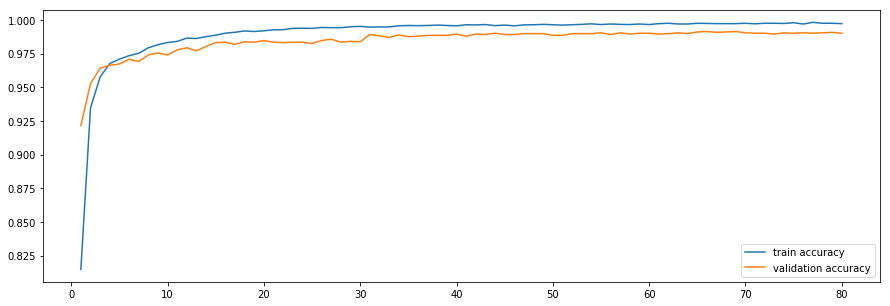

In [98]:
from keras.layers import *
from keras.models import Sequential

model1 = Sequential()
model1.add(Dense(28, activation="sigmoid", input_shape=(28,)))
model1.add(Dense(7, activation="softmax"))
model1.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
plot_m(model1)
train_hist1 = model1.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist1.history["acc"])
plt.plot(range(1, 81), train_hist1.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_74 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_75 (Dense)             (None, 7)                 203       
Total params: 1,827
Trainable params: 1,827
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/80
7350/7350 [==============================] - 1s 111us/step - loss: 1.1476 - acc: 0.7743 - val_loss: 0.5372 - val_acc: 0.9117
Epoch 2/80
7350/7350 [==============================] - 1s 91us/step - loss: 0.3293 - acc: 0.9389 - val_loss: 0.2152 - val_acc: 0.9498
Epoch 3/80
7350/7350 [==============================] - 1s 83u

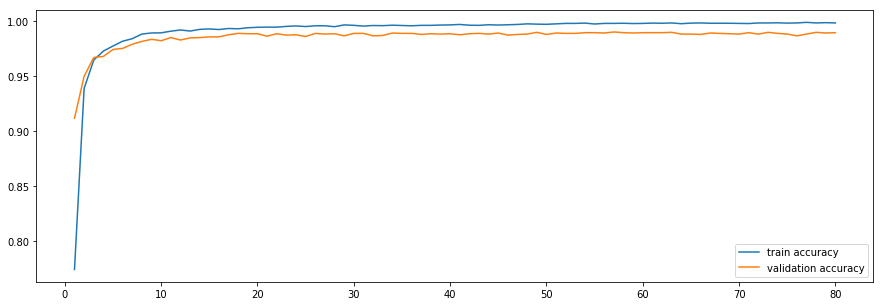

In [99]:
from keras.layers import *
from keras.models import Sequential

model2 = Sequential()
model2.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model2.add(Dense(28, activation="sigmoid"))

model2.add(Dense(7, activation="softmax"))
model2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
plot_m(model2)#, "model2.png")
train_hist2 = model2.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist2.history["acc"])
plt.plot(range(1, 81), train_hist2.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_77 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_78 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_79 (Dense)             (None, 7)                 203       
Total params: 2,639
Trainable params: 2,639
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/80
7350/7350 [==============================] - 1s 100us/step - loss: 1.4173 - acc: 0.5015 - val_loss: 0.8476 - val_acc: 0.7476
Epoch 2/80
7350/7350 [==============================] - 1s 91us/s

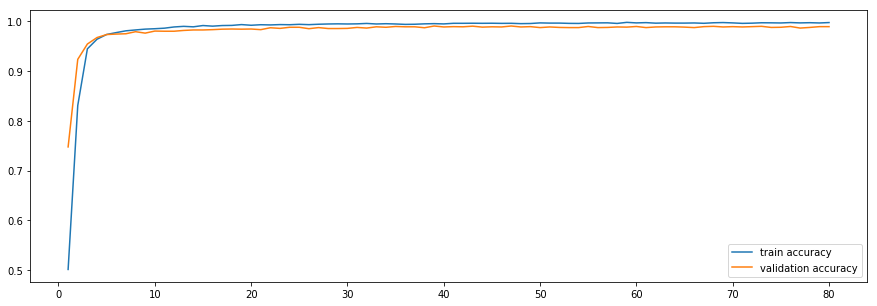

In [100]:
from keras.layers import *
from keras.models import Sequential

model3 = Sequential()
model3.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model3.add(Dense(28, activation="sigmoid"))
model3.add(Dense(28, activation="sigmoid"))


model3.add(Dense(7, activation="softmax"))
model3.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
plot_m(model3)

train_hist3 = model3.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist3.history["acc"])
plt.plot(range(1, 81), train_hist3.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_81 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_82 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_83 (Dense)             (None, 7)                 399       
Total params: 6,027
Trainable params: 6,027
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/80
7350/7350 [==============================] - 1s 101us/step - loss: 1.1543 - acc: 0.6589 - val_loss: 0.4898 - val_acc: 0.8927
Epoch 2/80
7350/7350 [==============================] - 1s 91us/s

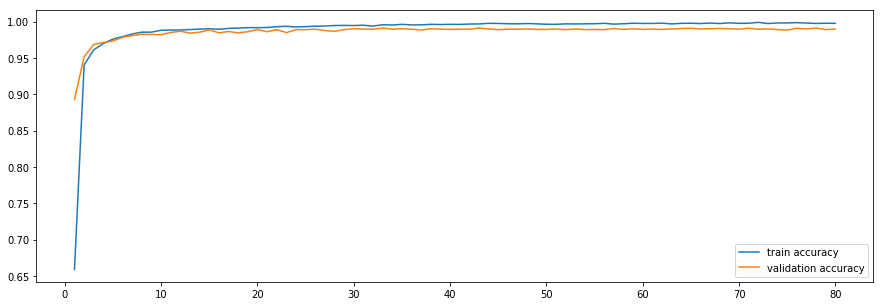

In [101]:
from keras.layers import *
from keras.models import Sequential

model4 = Sequential()
model4.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model4.add(Dense(56, activation="sigmoid"))
model4.add(Dense(56, activation="sigmoid"))


model4.add(Dense(7, activation="softmax"))
model4.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

plot_m(model4)

train_hist4 = model4.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist4.history["acc"])
plt.plot(range(1, 81), train_hist4.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_85 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_86 (Dense)             (None, 28)                1596      
_________________________________________________________________
dense_87 (Dense)             (None, 7)                 203       
Total params: 4,235
Trainable params: 4,235
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/80
7350/7350 [==============================] - 1s 98us/step - loss: 1.2703 - acc: 0.6533 - val_loss: 0.5976 - val_acc: 0.8689
Epoch 2/80
7350/7350 [==============================] - 1s 88us/st

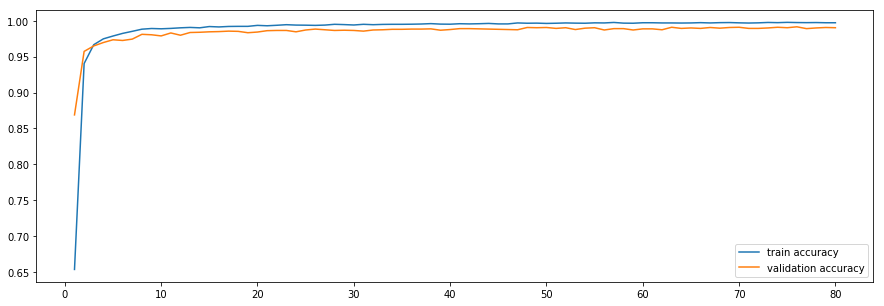

In [102]:
from keras.layers import *
from keras.models import Sequential

model5 = Sequential()
model5.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model5.add(Dense(56, activation="sigmoid"))
model5.add(Dense(28, activation="sigmoid"))


model5.add(Dense(7, activation="softmax"))
model5.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

plot_m(model5)

train_hist5 = model5.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist5.history["acc"])
plt.plot(range(1, 81), train_hist5.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_89 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_90 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_91 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_92 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_93 (Dense)             (None, 7)                 203       
Total params: 4,263
Trainable params: 4,263
Non-trainable params: 0
___________________________________________________

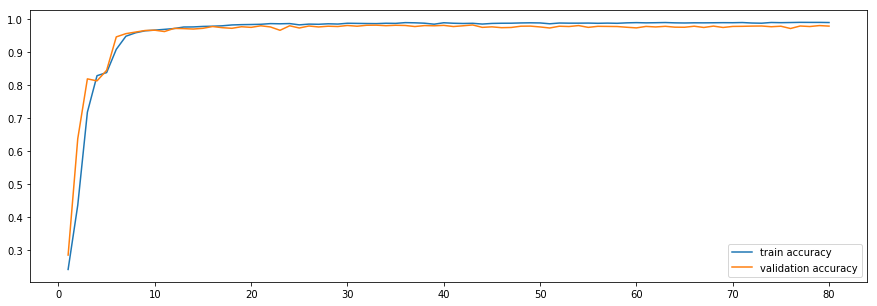

In [103]:
from keras.layers import *
from keras.models import Sequential

model6 = Sequential()
model6.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model6.add(Dense(28, activation="sigmoid"))
model6.add(Dense(28, activation="sigmoid"))
model6.add(Dense(28, activation="sigmoid"))
model6.add(Dense(28, activation="sigmoid"))


model6.add(Dense(7, activation="softmax"))
model6.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

plot_m(model6)

train_hist6 = model6.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist6.history["acc"])
plt.plot(range(1, 81), train_hist6.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_95 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_96 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_97 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_98 (Dense)             (None, 28)                1596      
_________________________________________________________________
dense_99 (Dense)             (None, 7)                 203       
Total params: 8,239
Trainable params: 8,239
Non-trainable params: 0
___________________________________________________

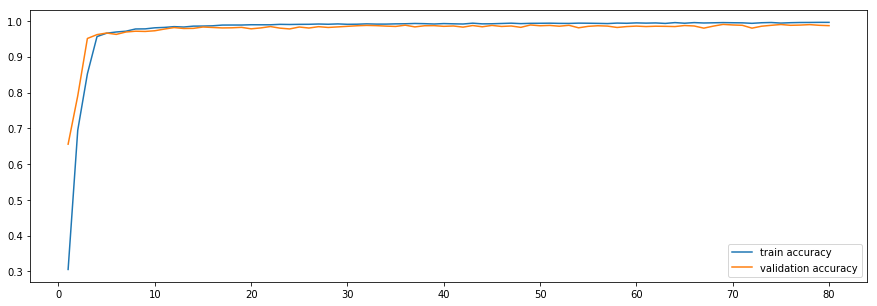

In [104]:
from keras.layers import *
from keras.models import Sequential

model7 = Sequential()
model7.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model7.add(Dense(28, activation="sigmoid"))
model7.add(Dense(56, activation="sigmoid"))
model7.add(Dense(56, activation="sigmoid"))
model7.add(Dense(28, activation="sigmoid"))


model7.add(Dense(7, activation="softmax"))
model7.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])


plot_m(model7)

train_hist7 = model7.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist7.history["acc"])
plt.plot(range(1, 81), train_hist7.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_101 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_102 (Dense)            (None, 56)                1624      
_________________________________________________________________
dense_103 (Dense)            (None, 56)                3192      
_________________________________________________________________
dense_104 (Dense)            (None, 112)               6384      
_________________________________________________________________
dense_105 (Dense)            (None, 7)                 791       
Total params: 13,615
Trainable params: 13,615
Non-trainable params: 0
_________________________________________________

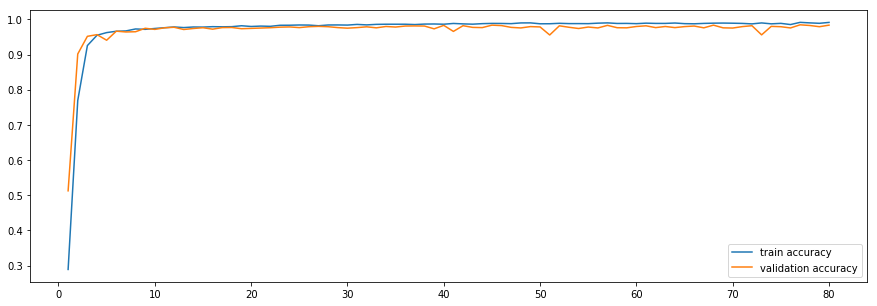

In [105]:
from keras.layers import *
from keras.models import Sequential

model8 = Sequential()
model8.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model8.add(Dense(28, activation="sigmoid"))
model8.add(Dense(56, activation="sigmoid"))
model8.add(Dense(56, activation="sigmoid"))
model8.add(Dense(112, activation="sigmoid"))


model8.add(Dense(7, activation="softmax"))
model8.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])


plot_m(model8)

train_hist8 = model8.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist8.history["acc"])
plt.plot(range(1, 81), train_hist8.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

In [106]:
models_list = [model1, model2, model3, model4, model5, model6, model7, model8]
train_hists = [train_hist1, train_hist2, train_hist3, train_hist4, train_hist5, train_hist6, train_hist7, train_hist8]

In [107]:
def get_max_val_acc_epoch(train_hist):
    return np.argmax(train_hist.history["val_acc"])

def get_max_val_acc(train_hist):
    return np.max(train_hist.history["val_acc"])


In [108]:
best_accs_epochs = [get_max_val_acc_epoch(tr_h) for tr_h in train_hists]

In [109]:
best_accs = [get_max_val_acc(tr_h) for tr_h in train_hists]

In [110]:
best_accs_epochs

[65, 56, 38, 32, 75, 42, 68, 76]

In [111]:
best_accs

[0.991428554058075,
 0.99015873670578,
 0.9904761910438538,
 0.9911110997200012,
 0.9917460083961487,
 0.9828571677207947,
 0.9904761910438538,
 0.9844444394111633]

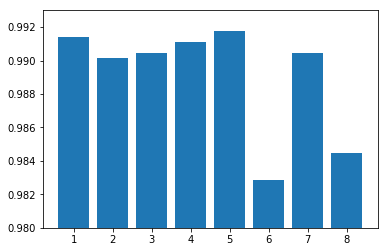

In [112]:
plt.bar(range(1, 1+len(best_accs)), best_accs)
plt.ylim(0.98, 0.993)
plt.show()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_107 (Dense)            (None, 7)                 203       
Total params: 1,015
Trainable params: 1,015
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/80
7350/7350 [==============================] - 1s 88us/step - loss: 0.7402 - acc: 0.8107 - val_loss: 0.3743 - val_acc: 0.9203
Epoch 2/80
7350/7350 [==============================] - 1s 82us/step - loss: 0.2966 - acc: 0.9235 - val_loss: 0.2518 - val_acc: 0.9333
Epoch 3/80
7350/7350 [==============================] - 1s 78us/step - loss: 0.2098 - acc: 0.9395 - val_loss: 0.1908 - val_acc: 0.9511
Epoch 4/80
7350/7350 [==============================] - 1s 8

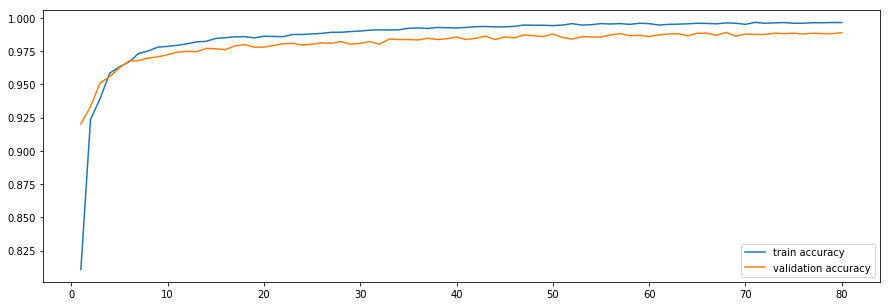

In [113]:
from keras.layers import *
from keras.models import Sequential

model_tan1 = Sequential()
model_tan1.add(Dense(28, activation="tanh", input_shape=(28,)))
model_tan1.add(Dense(7, activation="softmax"))
model_tan1.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
plot_m(model_tan1)
train_hist1_tanh = model_tan1.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist1_tanh.history["acc"])
plt.plot(range(1, 81), train_hist1_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_109 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_110 (Dense)            (None, 7)                 203       
Total params: 1,827
Trainable params: 1,827
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/80
7350/7350 [==============================] - 1s 94us/step - loss: 0.5453 - acc: 0.8491 - val_loss: 0.2500 - val_acc: 0.9283
Epoch 2/80
7350/7350 [==============================] - 1s 87us/step - loss: 0.1976 - acc: 0.9416 - val_loss: 0.1610 - val_acc: 0.9568
Epoch 3/80
7350/7350 [==============================] - 1s 91us

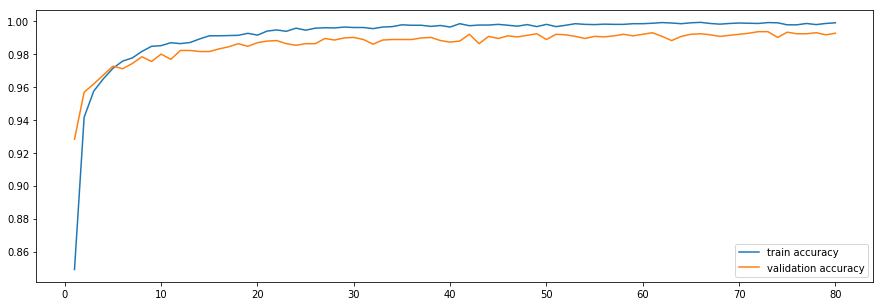

In [114]:
from keras.layers import *
from keras.models import Sequential

model_tan2 = Sequential()
model_tan2.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan2.add(Dense(28, activation="tanh"))

model_tan2.add(Dense(7, activation="softmax"))
model_tan2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
plot_m(model_tan2)#, "model_tan2.png")
train_hist2_tanh = model_tan2.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist2_tanh.history["acc"])
plt.plot(range(1, 81), train_hist2_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_112 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_113 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_114 (Dense)            (None, 7)                 203       
Total params: 2,639
Trainable params: 2,639
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/80
7350/7350 [==============================] - 1s 99us/step - loss: 0.4524 - acc: 0.8830 - val_loss: 0.1979 - val_acc: 0.9511
Epoch 2/80
7350/7350 [==============================] - 1s 87us/st

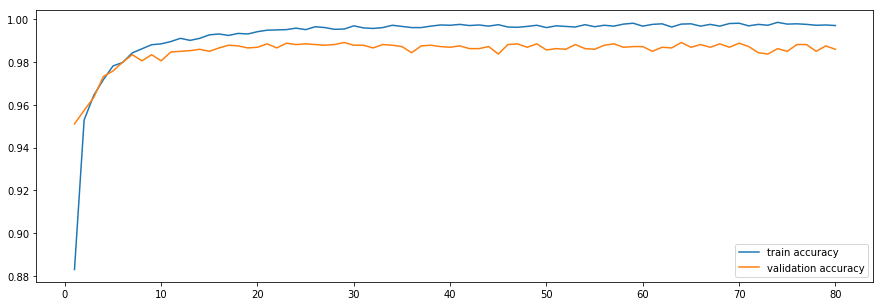

In [115]:
from keras.layers import *
from keras.models import Sequential

model_tan3 = Sequential()
model_tan3.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan3.add(Dense(28, activation="tanh"))
model_tan3.add(Dense(28, activation="tanh"))


model_tan3.add(Dense(7, activation="softmax"))
model_tan3.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
plot_m(model_tan3)

train_hist3_tanh = model_tan3.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist3_tanh.history["acc"])
plt.plot(range(1, 81), train_hist3_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_116 (Dense)            (None, 56)                1624      
_________________________________________________________________
dense_117 (Dense)            (None, 56)                3192      
_________________________________________________________________
dense_118 (Dense)            (None, 7)                 399       
Total params: 6,027
Trainable params: 6,027
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/80
7350/7350 [==============================] - 1s 106us/step - loss: 0.3419 - acc: 0.9018 - val_loss: 0.1798 - val_acc: 0.9498
Epoch 2/80
7350/7350 [==============================] - 1s 87us/s

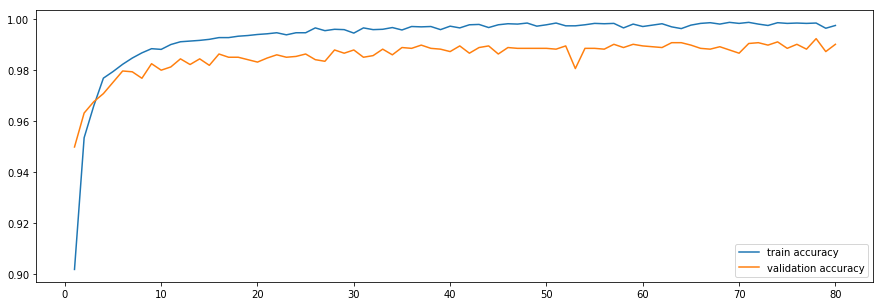

In [116]:
from keras.layers import *
from keras.models import Sequential

model_tan4 = Sequential()
model_tan4.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan4.add(Dense(56, activation="tanh"))
model_tan4.add(Dense(56, activation="tanh"))


model_tan4.add(Dense(7, activation="softmax"))
model_tan4.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

plot_m(model_tan4)

train_hist4_tanh = model_tan4.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist4_tanh.history["acc"])
plt.plot(range(1, 81), train_hist4_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_120 (Dense)            (None, 56)                1624      
_________________________________________________________________
dense_121 (Dense)            (None, 28)                1596      
_________________________________________________________________
dense_122 (Dense)            (None, 7)                 203       
Total params: 4,235
Trainable params: 4,235
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/80
7350/7350 [==============================] - 1s 100us/step - loss: 0.3849 - acc: 0.8925 - val_loss: 0.1626 - val_acc: 0.9530
Epoch 2/80
7350/7350 [==============================] - 1s 90us/s

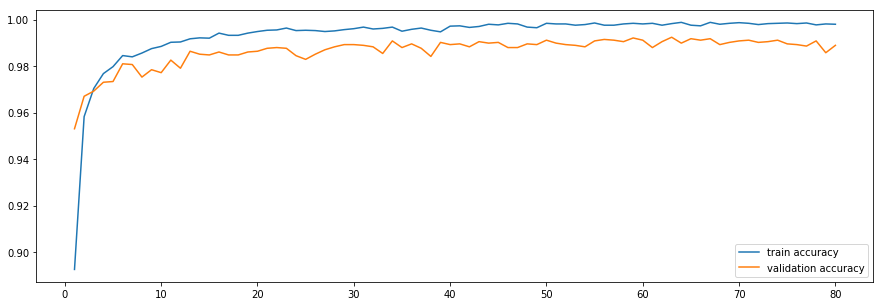

In [117]:
from keras.layers import *
from keras.models import Sequential

model_tan5 = Sequential()
model_tan5.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan5.add(Dense(56, activation="tanh"))
model_tan5.add(Dense(28, activation="tanh"))


model_tan5.add(Dense(7, activation="softmax"))
model_tan5.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

plot_m(model_tan5)

train_hist5_tanh = model_tan5.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist5_tanh.history["acc"])
plt.plot(range(1, 81), train_hist5_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_124 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_125 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_126 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_127 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_128 (Dense)            (None, 7)                 203       
Total params: 4,263
Trainable params: 4,263
Non-trainable params: 0
___________________________________________________

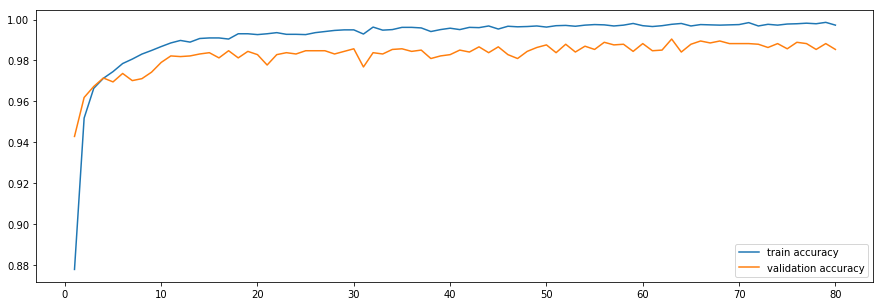

In [118]:
from keras.layers import *
from keras.models import Sequential

model_tan6 = Sequential()
model_tan6.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan6.add(Dense(28, activation="tanh"))
model_tan6.add(Dense(28, activation="tanh"))
model_tan6.add(Dense(28, activation="tanh"))
model_tan6.add(Dense(28, activation="tanh"))


model_tan6.add(Dense(7, activation="softmax"))
model_tan6.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

plot_m(model_tan6)

train_hist6_tanh = model_tan6.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist6_tanh.history["acc"])
plt.plot(range(1, 81), train_hist6_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_130 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_131 (Dense)            (None, 56)                1624      
_________________________________________________________________
dense_132 (Dense)            (None, 56)                3192      
_________________________________________________________________
dense_133 (Dense)            (None, 28)                1596      
_________________________________________________________________
dense_134 (Dense)            (None, 7)                 203       
Total params: 8,239
Trainable params: 8,239
Non-trainable params: 0
___________________________________________________

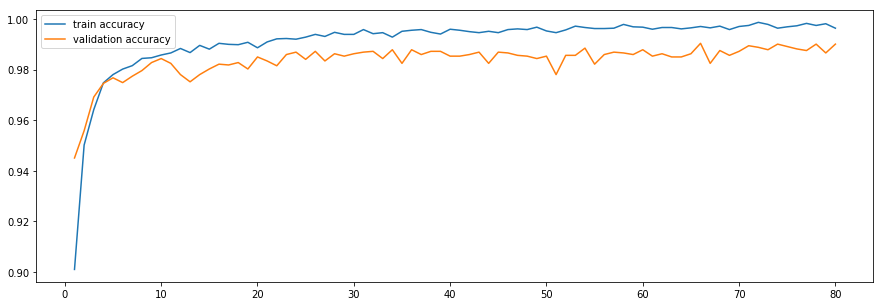

In [119]:
from keras.layers import *
from keras.models import Sequential

model_tan7 = Sequential()
model_tan7.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan7.add(Dense(28, activation="tanh"))
model_tan7.add(Dense(56, activation="tanh"))
model_tan7.add(Dense(56, activation="tanh"))
model_tan7.add(Dense(28, activation="tanh"))


model_tan7.add(Dense(7, activation="softmax"))
model_tan7.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])


plot_m(model_tan7)

train_hist7_tanh = model_tan7.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist7_tanh.history["acc"])
plt.plot(range(1, 81), train_hist7_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_136 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_137 (Dense)            (None, 56)                1624      
_________________________________________________________________
dense_138 (Dense)            (None, 56)                3192      
_________________________________________________________________
dense_139 (Dense)            (None, 112)               6384      
_________________________________________________________________
dense_140 (Dense)            (None, 7)                 791       
Total params: 13,615
Trainable params: 13,615
Non-trainable params: 0
_________________________________________________

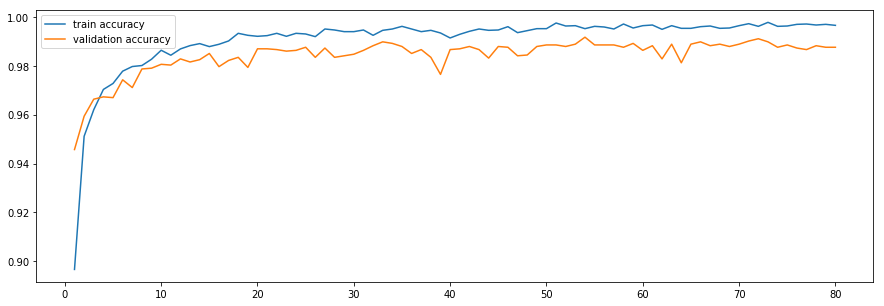

In [120]:
from keras.layers import *
from keras.models import Sequential

model_tan8 = Sequential()
model_tan8.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan8.add(Dense(28, activation="tanh"))
model_tan8.add(Dense(56, activation="tanh"))
model_tan8.add(Dense(56, activation="tanh"))
model_tan8.add(Dense(112, activation="tanh"))


model_tan8.add(Dense(7, activation="softmax"))
model_tan8.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])


plot_m(model_tan8)

train_hist8_tanh = model_tan8.fit(np.array(X_train), np.array(y_train),
                       epochs=80, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 81), train_hist8_tanh.history["acc"])
plt.plot(range(1, 81), train_hist8_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

In [121]:
sigmoid_models_list = [train_hist1,
                       train_hist2,
                       train_hist3,
                       train_hist4,
                       train_hist5,
                       train_hist6,
                       train_hist7,
                       train_hist8]

tanh_models_list = [train_hist1_tanh,
                    train_hist2_tanh,
                    train_hist3_tanh,
                    train_hist4_tanh,
                    train_hist5_tanh,
                    train_hist6_tanh,
                    train_hist7_tanh,
                    train_hist8_tanh]

In [146]:
import pickle
hist_counter = 1

for sigm_hist, tanh_hist in zip(sigmoid_models_list, tanh_models_list):
    s_h, t_h = sigm_hist.history, tanh_hist.history
    with open('sigm_hist_{}'.format(hist_counter), 'wb') as file_pi_sigm:
        pickle.dump(s_h, file_pi_sigm)
    with open('tanh_hist_{}'.format(hist_counter), 'wb') as file_pi_tanh:
        pickle.dump(t_h, file_pi_tanh)
    hist_counter += 1

In [122]:
def plot_accuraces(sigm_history, tanh_history, topology_num):
    sigm_train_acc = sigm_history.history["acc"]
    sigm_val_acc = sigm_history.history["val_acc"]
    
    tanh_train_acc = tanh_history.history["acc"]
    tanh_val_acc = tanh_history.history["val_acc"]
    
    x = range(1, len(sigm_train_acc) + 1)
    
    fig, axs = plt.subplots(2)
    fig.suptitle("Изменение точности в процессе обучения топологии {}".format(topology_num))

    axs[0].plot(x, sigm_train_acc, label="Точность на тестовом датасете")
    axs[0].plot(x, sigm_val_acc, "--", label="Точность на валидационном датасете")
    axs[0].set_title("Сигмоидная функция активации", x=0.63, y= 0.37)
    axs[0].legend()
    axs[0].set_ylim(0.9, 1)

    
    axs[1].plot(x, tanh_train_acc, label="Точность на тестовом датасете")
    axs[1].plot(x, tanh_val_acc, "--", label="Точность на валидационном датасете")
    axs[1].set_title("Гиперболический тангенс", x=0.63, y= 0.37)
    axs[1].legend()
    axs[1].set_ylim(0.9, 1)

    
    plt.savefig("{}_train.png".format(topology_num), dpi=300)
    plt.show()

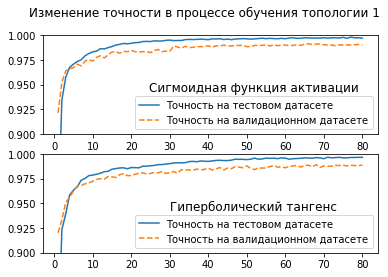

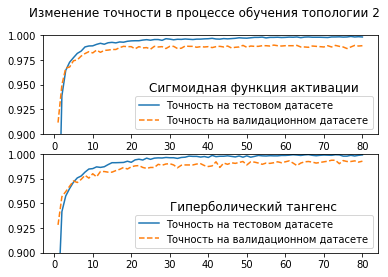

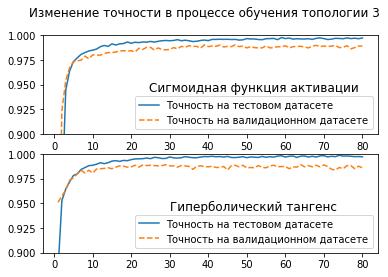

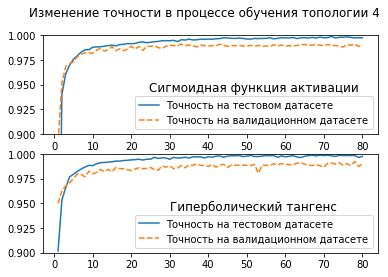

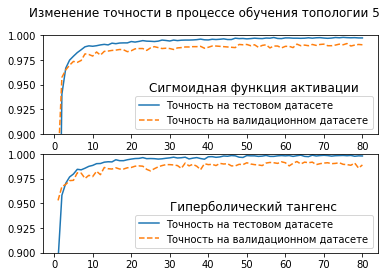

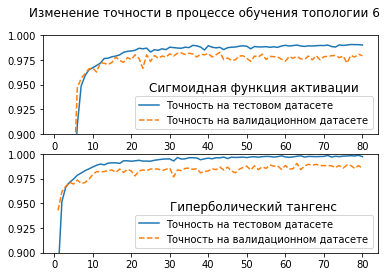

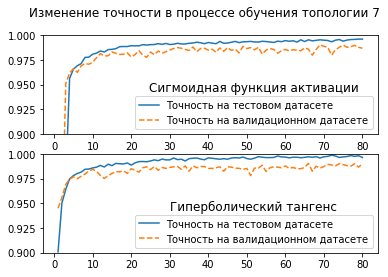

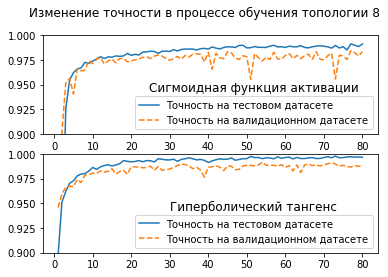

In [123]:
c = 1
for s, t in zip(sigmoid_models_list, tanh_models_list):

    plot_accuraces(s, t, c)
    c += 1

In [124]:
max_accuraces_sigm_models = [max(train_h.history["val_acc"]) for train_h in sigmoid_models_list]
max_accuraces_tanh_models = [max(train_h.history["val_acc"]) for train_h in tanh_models_list]

epochs_needed_to_sigm = [np.argmax(train_h.history["val_acc"]) for train_h in sigmoid_models_list]
epochs_needed_to_tanh = [np.argmax(train_h.history["val_acc"]) for train_h in tanh_models_list]

In [125]:
epochs_needed_to_sigm

[65, 56, 38, 32, 75, 42, 68, 76]

In [126]:
epochs_needed_to_tanh

[67, 71, 28, 77, 62, 62, 65, 53]

In [127]:
max_sigm_acc = max(max_accuraces_sigm_models)
max_sigm_acc_model = np.argmax(max_accuraces_sigm_models) + 1

max_tanh_acc = max(max_accuraces_tanh_models)
max_tanh_acc_model = np.argmax(max_accuraces_tanh_models) + 1

In [128]:
print("Max sigm acc: {}".format(max_sigm_acc))
print("Max tanh acc: {}".format(max_tanh_acc))

Max sigm acc: 0.9917460083961487
Max tanh acc: 0.9936507940292358


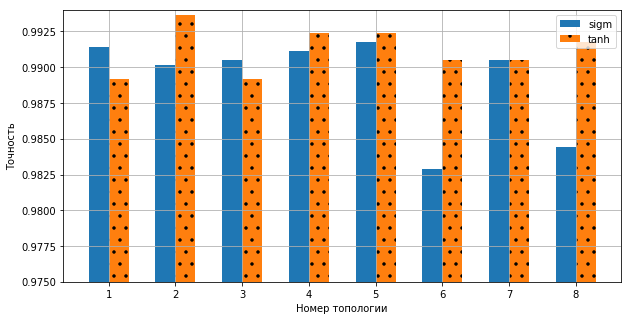

In [147]:
import numpy as np
from matplotlib import pyplot as plt

width = 0.3

x = np.array(list(range(1, len(max_accuraces_sigm_models)+1)))

max_s_acc = np.array(max_accuraces_sigm_models)
max_t_acc = np.array(max_accuraces_tanh_models)

plt.figure(figsize=(10, 5))
plt.bar(x-width/2, max_s_acc, width=width, label="sigm")
plt.bar(x+width/2, max_t_acc,  hatch=".", width=width, label="tanh")
plt.ylim(0.975, 0.994)
plt.legend()
plt.grid()
plt.xlabel("Номер топологии")
plt.ylabel("Точность")

plt.savefig("Точность_номер_топологии.png", dpi=300)

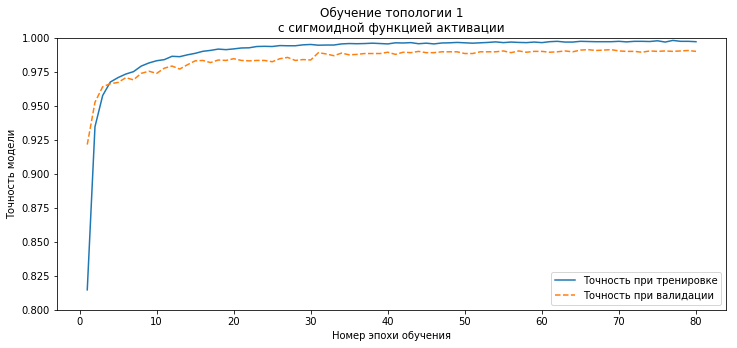

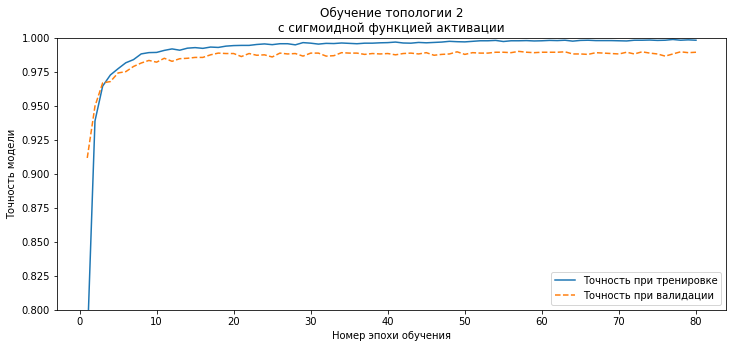

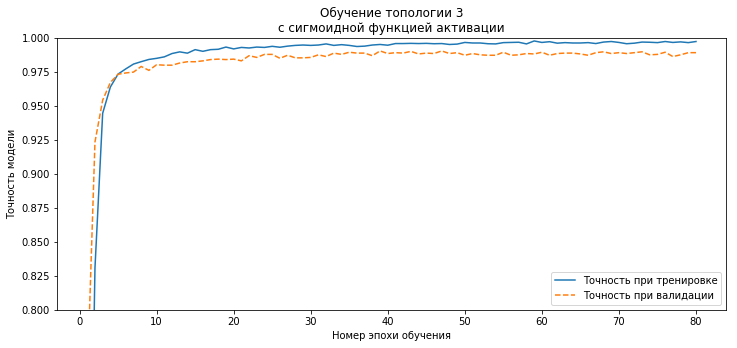

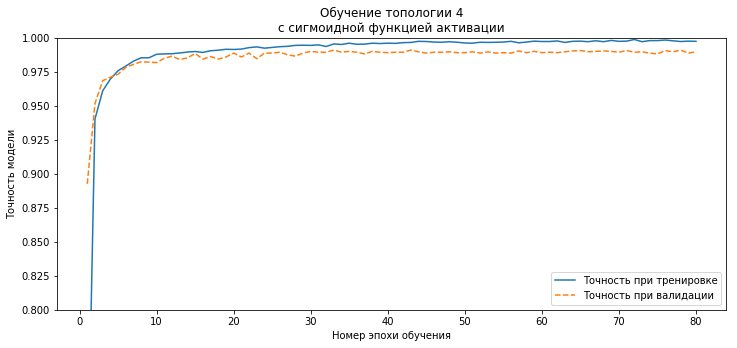

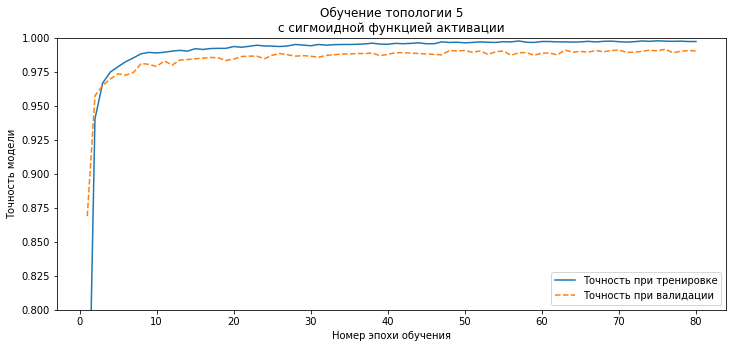

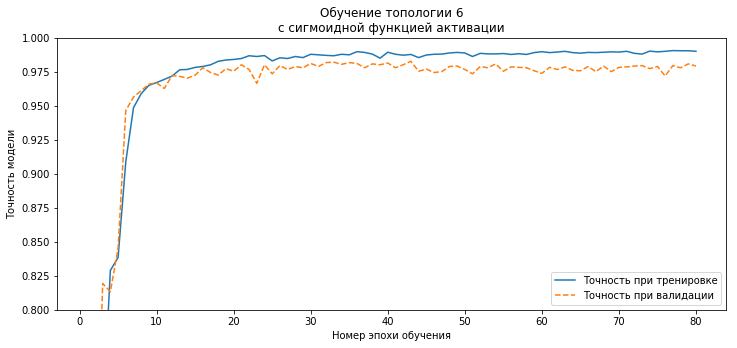

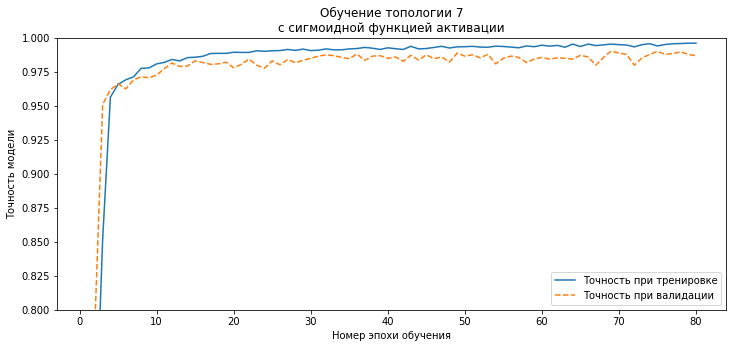

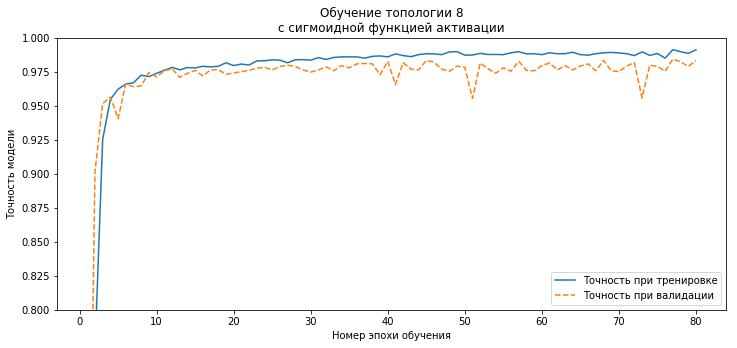

In [148]:
topology_num = 1
counter = 1

for history in sigmoid_models_list:
    train_acc = history.history["acc"]
    valid_acc = history.history["val_acc"]
    title = "Обучение топологии {}\nс сигмоидной функцией активации".format(counter)
    counter += 1
    
    plt.figure(figsize=(12, 5))
    plt.plot(range(1, len(train_acc)+1), train_acc, label="Точность при тренировке")
    plt.plot(range(1, len(valid_acc)+1), valid_acc, "--", label="Точность при валидации")
    plt.title(title)
    plt.xlabel("Номер эпохи обучения")
    plt.ylabel("Точность модели")
    plt.legend()
    plt.ylim((0.8, 1.))
    plt.savefig("sigm_train_{}.png".format(topology_num), dpi=300)
    topology_num += 1

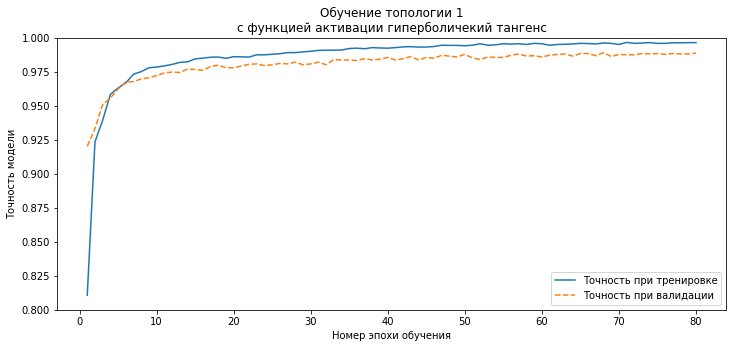

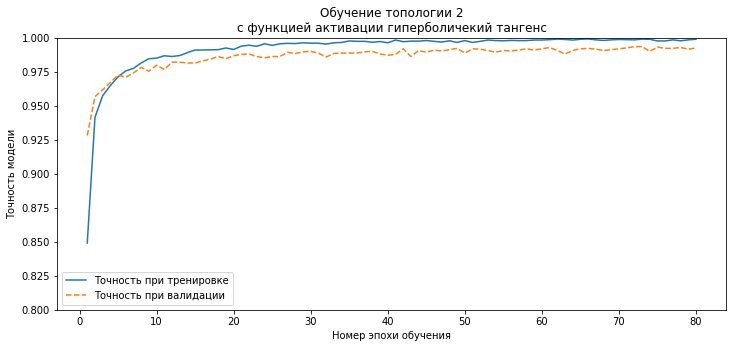

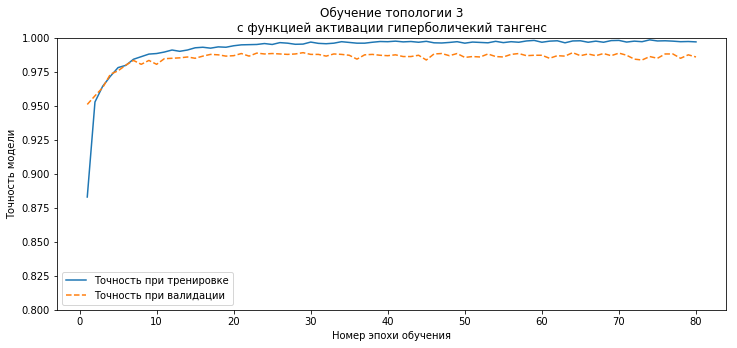

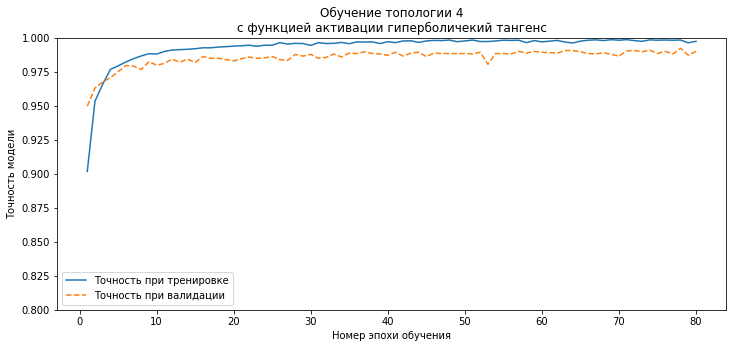

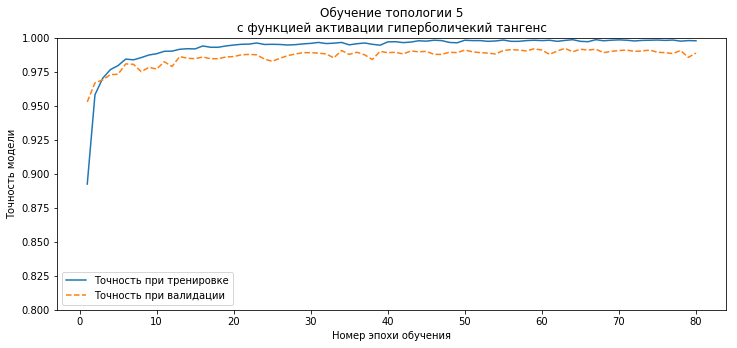

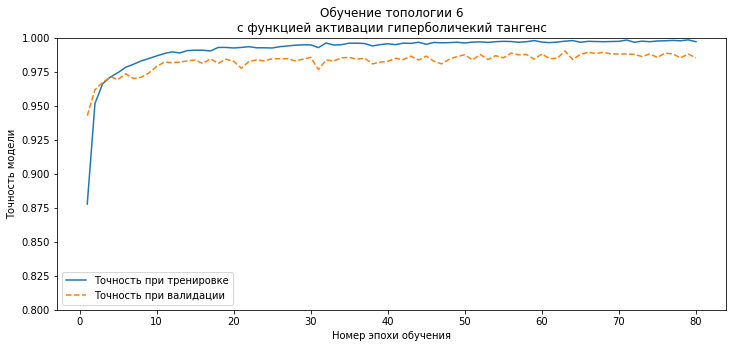

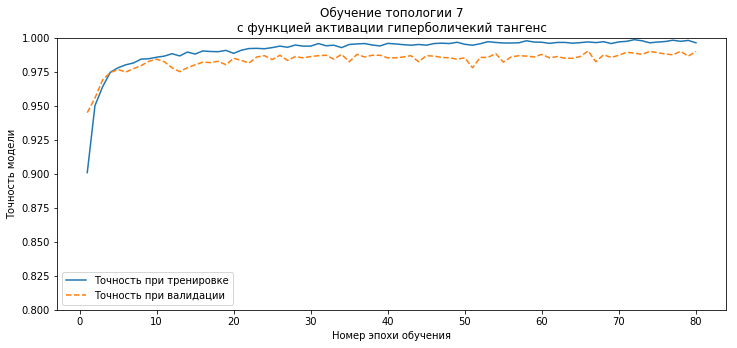

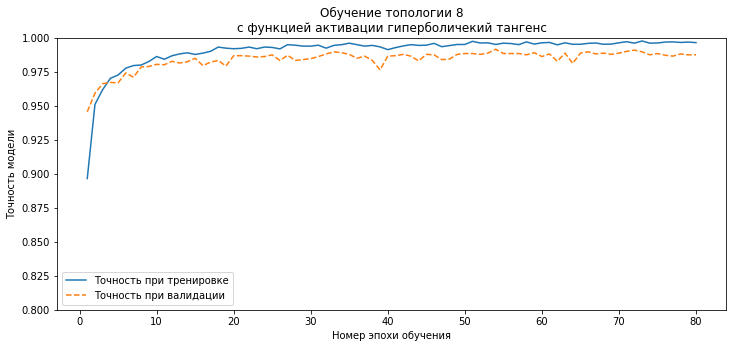

In [149]:
# topology_num = 1
# counter = 1
# for history in tanh_models_list:
#     train_acc = history.history["acc"]
#     valid_acc = history.history["val_acc"]
#     title = "Обучение топологии {}".format(counter)
#     counter += 1
#     plt.figure(figsize=(12, 5))
#     plt.ylim((0.8, 1.))
#     plt.plot(range(1, len(train_acc)+1), train_acc, label="Точность при тренировке")
#     plt.plot(range(1, len(valid_acc)+1), valid_acc, "--", label="Точность при валидации")
#     plt.xlabel("Номер эпохи обучения")
#     plt.ylabel("Точность модели")
#     plt.legend()
#     plt.savefig("tanh_train_{}.png".format(topology_num), dpi=300)
#     topology_num += 1

    
topology_num = 1
counter = 1

for history in tanh_models_list:
    train_acc = history.history["acc"]
    valid_acc = history.history["val_acc"]
    title = "Обучение топологии {}\nс функцией активации гиперболичекий тангенс".format(counter)
    counter += 1
    
    plt.figure(figsize=(12, 5))
    plt.plot(range(1, len(train_acc)+1), train_acc, label="Точность при тренировке")
    plt.plot(range(1, len(valid_acc)+1), valid_acc, "--", label="Точность при валидации")
    plt.title(title)
    plt.xlabel("Номер эпохи обучения")
    plt.ylabel("Точность модели")
    plt.legend()
    plt.ylim((0.8, 1.))
    plt.savefig("tanh_train_{}.png".format(topology_num), dpi=300)
    topology_num += 1

In [132]:
tanh_tr_acc_stds = []
tanh_val_acc_stds = []

for history in tanh_models_list:
    train_acc = history.history["acc"]
    valid_acc = history.history["val_acc"]
    tanh_tr_acc_stds.append(np.std(train_acc))
    tanh_val_acc_stds.append(np.std(valid_acc))
    
print(tanh_tr_acc_stds)
print(tanh_val_acc_stds)

[0.023140242, 0.018707765, 0.014366577, 0.012491558, 0.013078131, 0.014907293, 0.012637721, 0.0131700095]
[0.011340483243621404, 0.009592621715660173, 0.00619401167721507, 0.006450208126636302, 0.0063671760528553785, 0.0069978853032433294, 0.006704538885620358, 0.007336471796433801]


In [133]:
sigmoid_acc_differences = []

for history in sigmoid_models_list:
    train_acc = history.history["acc"]
    valid_acc = history.history["val_acc"]
    full_diff_list = []
    for tr_acc_value, val_acc_value in zip(train_acc, valid_acc):
        diff = abs(tr_acc_value - val_acc_value)
        full_diff_list.append(diff)
    sigmoid_acc_differences.append(full_diff_list)

In [134]:
tanh_acc_differences = []

for history in tanh_models_list:
    train_acc = history.history["acc"]
    valid_acc = history.history["val_acc"]
    full_diff_list = []
    for tr_acc_value, val_acc_value in zip(train_acc, valid_acc):
        diff = abs(tr_acc_value - val_acc_value)
        full_diff_list.append(diff)
    tanh_acc_differences.append(full_diff_list)

In [135]:
sigm_diff_std = np.std(sigmoid_acc_differences, axis=1)

In [136]:
sigm_diff_std

array([0.01123809, 0.01448384, 0.02812234, 0.02536459, 0.02317177,
       0.02423833, 0.04046565, 0.02804577])

In [137]:
tang_diff_std = np.std(tanh_acc_differences, axis=1)

In [138]:
tang_diff_std

array([0.01146251, 0.00829005, 0.00721793, 0.0048674 , 0.00616485,
       0.00669257, 0.00492393, 0.00529043])

In [139]:
sigm_mean_diff = np.mean(sigmoid_acc_differences, axis=1)

In [140]:
sigm_mean_diff

array([0.00864456, 0.00959581, 0.01135828, 0.00912018, 0.0101746 ,
       0.01349547, 0.01386395, 0.01279138])

In [141]:
tanh_mean_diff = np.mean(tanh_acc_differences, axis=1)

In [143]:
tanh_mean_diff

array([0.00898413, 0.00791213, 0.00924434, 0.00909751, 0.00851361,
       0.01069955, 0.0090805 , 0.0080805 ])